## Introduction

This project is from Kaggle, and the goal of this project is to analyze the social media platform's (Facebook in this case) sales conversion.

### Data sources
* The data in this project is from an anonymous organization's social media ad campaign. The file is in csv form and contains 1143 observations in 11 variables. Below are the descriptions of the variables.
1. `ad_id`: an unique ID for each ad
2. `xyzcampaignid`: an ID associated with each ad campaign of XYZ company
3. `fbcampaignid`: an ID associated with how Facebook (FB) tracks each campaign
4. `age`: age of the person to whom the ad is shown
5. `gender`: gender of the person to whom the ad is shown 
6. `interest`: a code specifying the category to which the person's interest belongs (interests are as mentioned in the person's FB public profile)
7. `impressions`: the number of times the ad was shown
8. `clicks`: number of clicks on for that ad
9. `spent`: amount paid by company xyz to FB to show that ad
10. `total conversion`: total number of people who enquired about the product after seeing the ad
11. `approved conversion`: total number of people who bought the product after seeing the ad  


### Loading the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'AppleGothic'

In [2]:
df = pd.read_csv("./KAG_conversion_data.csv")
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [3]:
# Checking to see if there are any null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


There is no null value in this dataset!

### Analysis using EDA (Exploratory Data Analysis)

In [4]:
df.shape

(1143, 11)

There are 1,143 rows and 11 columns. 

In [5]:
df.describe()

,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
count,1.143000e+03,1143.000000,1143.000000,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000
mean,9.872611e+05,1067.382327,133783.989501,32.766404,1.867321e+05,33.390201,51.360656,2.855643,0.944007
std,1.939928e+05,121.629393,20500.308622,26.952131,3.127622e+05,56.892438,86.908418,4.483593,1.737708
min,7.087460e+05,916.000000,103916.000000,2.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000
25%,7.776325e+05,936.000000,115716.000000,16.000000,6.503500e+03,1.000000,1.480000,1.000000,0.000000
50%,1.121185e+06,1178.000000,144549.000000,25.000000,5.150900e+04,8.000000,12.370000,1.000000,1.000000
75%,1.121804e+06,1178.000000,144657.500000,31.000000,2.217690e+05,37.500000,60.025000,3.000000,1.000000
max,1.314415e+06,1178.000000,179982.000000,114.000000,3.052003e+06,421.000000,639.949998,60.000000,21.000000


Let's look at the mean value of some of the variables.
* Impression has the average of 186,732.10
* Click has the average of 33.39
* Spent has the average of $51.36
* Total conversion has the average of 2.86
* Approved conversion has the average of 0.94


### Correlation Analysis using the correlation matrix

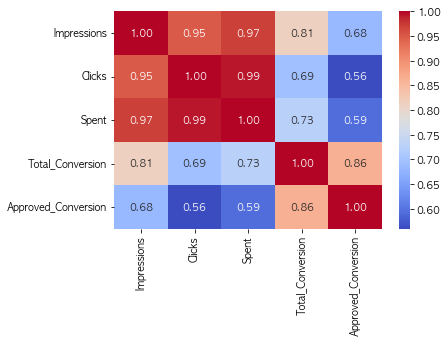

In [6]:
g = sns.heatmap(df[["Impressions","Clicks","Spent","Total_Conversion","Approved_Conversion"]].corr(),
              annot = True,
              fmt = ".2f",
              cmap = "coolwarm")

As we can see from the correlation matrix, the approved conversion has the most correlation with the total conversion, which makes sense, as people who enquire the product will have higher chance to purchase the product. The total conversion and impression have more correlation with the approved conversion than clicks and spent. 

### Analyzing the association between each variable and the approved conversion

Let's use regplot for this analysis.

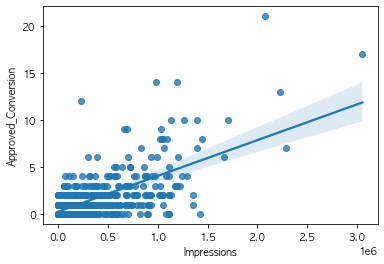

In [8]:
# Between Impressions and the Approved Conversion
sns.regplot(data=df, x="Impressions", y="Approved_Conversion");

Even though most of the approved conversion is located on the bottom left corner, the approved conversion spikes up after a certain point in impressions.

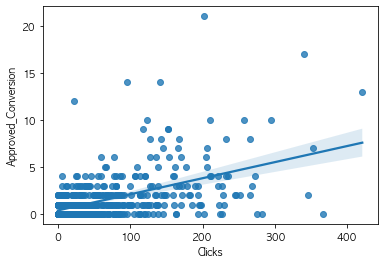

In [9]:
# Between Clicks and the Approved Conversion
sns.regplot(data=df, x="Clicks", y="Approved_Conversion");

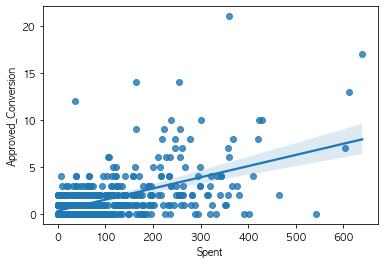

In [10]:
# Between Spent and the Approved Conversion
sns.regplot(data=df, x="Spent", y="Approved_Conversion");

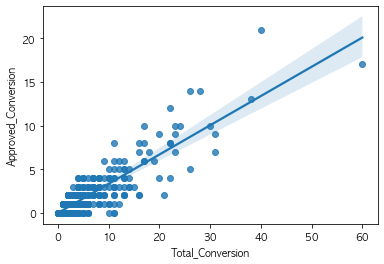

In [11]:
# Between Total Conversion and the Approved Conversion
sns.regplot(data=df, x="Total_Conversion", y="Approved_Conversion");

### Campaign Analysis

In [13]:
# what are the unique campaign id in this dataset?
df["xyz_campaign_id"].unique()

array([ 916,  936, 1178])

There are 3 different ad campaigns for the xyz company. We will assign each campaign as "campaignA", "campaignB", "campaignC" for clear understanding.

In [14]:
df["xyz_campaign_id"].replace({916:"campaignA",936:"campaignB",1178:"campaignC"}, inplace=True)

In [15]:
df

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,campaignA,103916,30-34,M,15,7350,1,1.430000,2,1
1,708749,campaignA,103917,30-34,M,16,17861,2,1.820000,2,0
2,708771,campaignA,103920,30-34,M,20,693,0,0.000000,1,0
3,708815,campaignA,103928,30-34,M,28,4259,1,1.250000,1,0
4,708818,campaignA,103928,30-34,M,28,4133,1,1.290000,1,1
...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,campaignC,179977,45-49,F,109,1129773,252,358.189997,13,2
1139,1314411,campaignC,179978,45-49,F,110,637549,120,173.880003,3,0
1140,1314412,campaignC,179979,45-49,F,111,151531,28,40.289999,2,0
1141,1314414,campaignC,179981,45-49,F,113,790253,135,198.710001,8,2


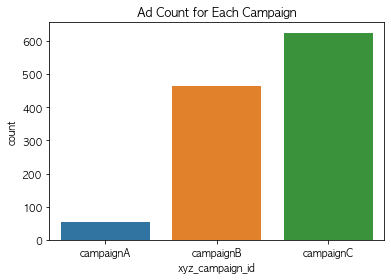

In [19]:
# Let's check how many ads there are for each campaign
sns.countplot(x ='xyz_campaign_id', data = df)
plt.title('Ad Count for Each Campaign')
plt.show()

We can see that the campaign C has the most ad count. 

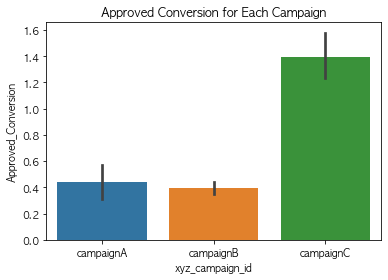

In [20]:
# Let's check the approved conversion count for each campaign
sns.barplot(x = df["xyz_campaign_id"], y = df["Approved_Conversion"])
plt.title("Approved Conversion for Each Campaign")
plt.show()

Again, campaign C has the most approved conversion, meaning most people bought products in campaign C.

### Using categorical variable: Age

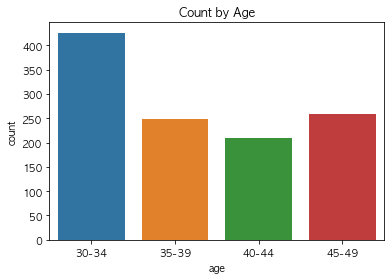

In [23]:
sns.countplot(x ='age', data = df) 
plt.title('Count by Age')
plt.show() 

We can see that the age group of 30-34 has the most count among other age groups. 

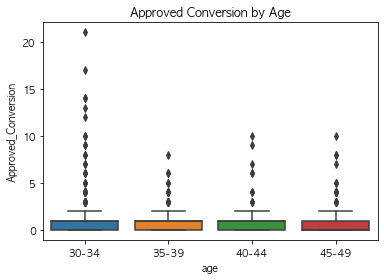

In [25]:
sns.boxplot(x = df['age'], y = df['Approved_Conversion'])
plt.title('Approved Conversion by Age')
plt.show()

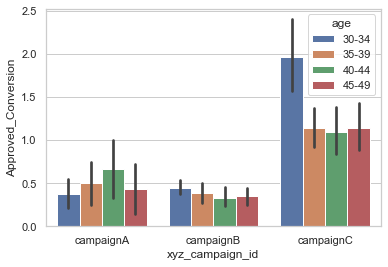

In [26]:
sns.set(style="whitegrid")
sns.barplot(x = df["xyz_campaign_id"], y = df["Approved_Conversion"], hue=df["age"])
plt.show()

It's interesting to note that the age group of 30-34 shows the highest interest in campaign B and campaign C, but the age group of 40-44 shows the highest in campaign A. The age group of 40-44 also shows the least interest in campaign B and campaign C.

### Using categorical variable: Gender

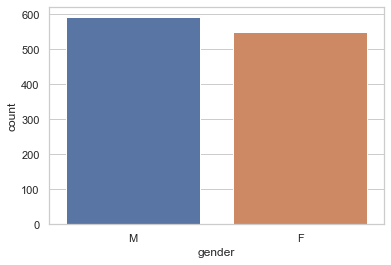

In [27]:
sns.countplot(x ='gender', data = df) 
plt.show() 

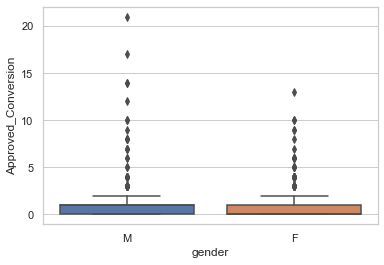

In [28]:
sns.boxplot(x=df['gender'], y=df['Approved_Conversion'])
plt.show()

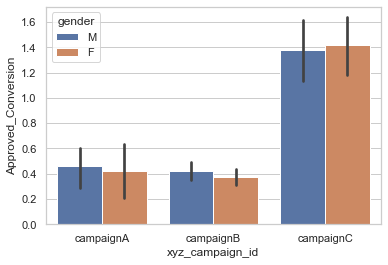

In [29]:
sns.set(style="whitegrid")
sns.barplot(x = df["xyz_campaign_id"], y = df["Approved_Conversion"], hue=df["gender"])
plt.show()

You can see that there are even interest in both gender for all the campaigns.

### Using categorical variable: Interest

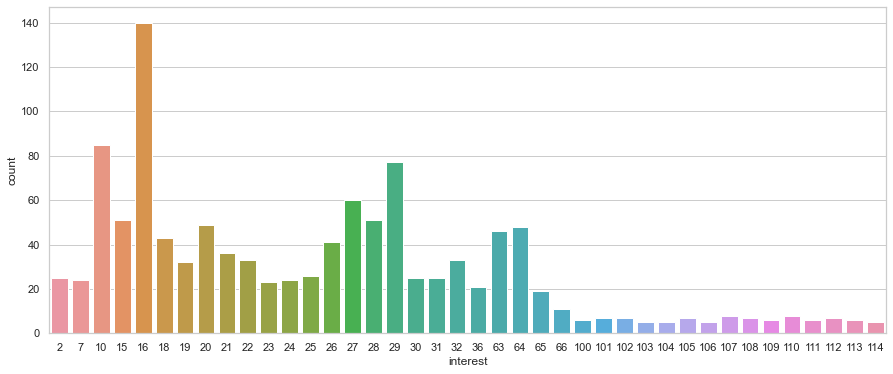

In [30]:
fig_dims = (15,6)
fig, ax = plt.subplots(figsize = fig_dims)
sns.countplot(x ='interest', data = df) 
plt.show() 

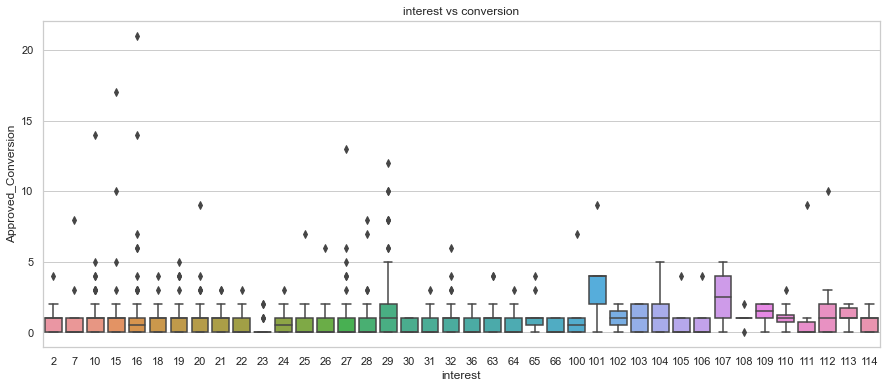

In [31]:
fig_dims = (15,6)
fig, ax = plt.subplots(figsize = fig_dims)
sns.boxplot(x=df['interest'], y=df['Approved_Conversion']);
plt.title("interest vs conversion")
plt.show()

In [32]:
df.query('interest > 100')['Approved_Conversion'].mean()

1.5280898876404494

In [33]:
df.query('interest < 100')['Approved_Conversion'].mean()

0.8912213740458015

Even though there are less count of interest for interest > 100, the approved conversion is higher, meaning there are more people who actually bought the product. 

### Using categorical variable: Spent


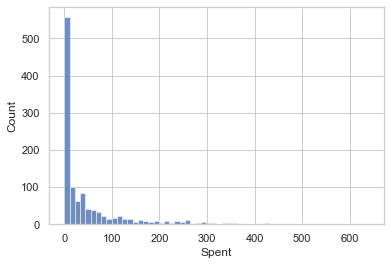

In [34]:
sns.histplot(data=df, x='Spent', alpha=0.8);

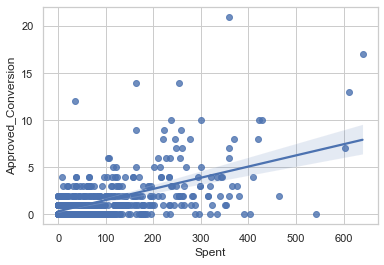

In [35]:
sns.regplot(data=df, x="Spent", y="Approved_Conversion");

We can see that there isn't significant correlation between the increase in spend and the approved conversion. 

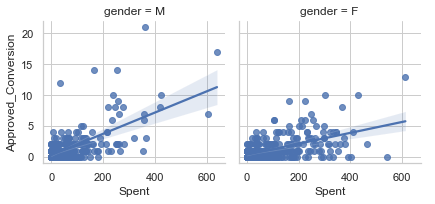

In [36]:
g = sns.FacetGrid(df, col="gender")
g.map(sns.regplot, "Spent", "Approved_Conversion")
g.add_legend();

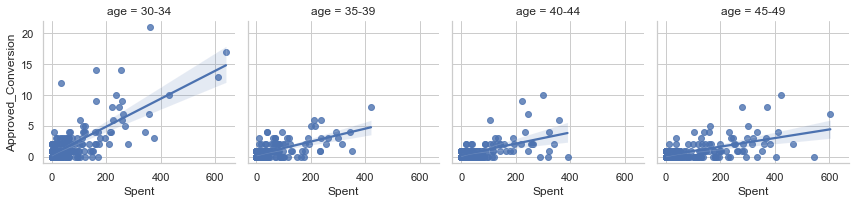

In [37]:
g = sns.FacetGrid(df, col="age")
g.map(sns.regplot, "Spent", "Approved_Conversion")
g.add_legend();

### Using categorical variable: Impressions


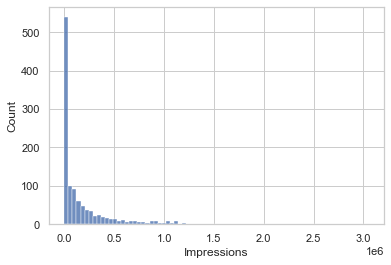

In [38]:
sns.histplot(data=df, x='Impressions', alpha=0.8);

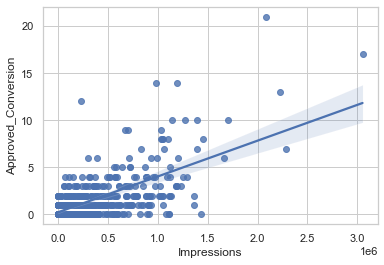

In [39]:
sns.regplot(data=df, x="Impressions", y="Approved_Conversion");

We can see that when the impression reaches certain point, the approved conversion increases. 

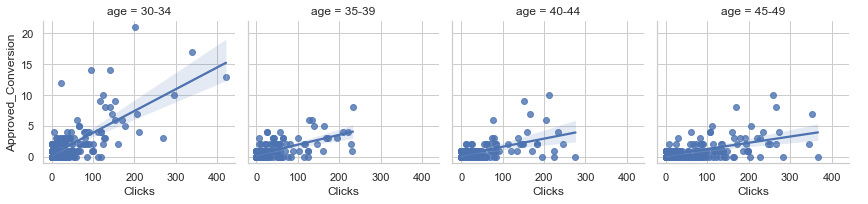

In [40]:
g = sns.FacetGrid(df, col="age")
g.map(sns.regplot, "Clicks", "Approved_Conversion")
g.add_legend();

We can see that the approved conversion is higher in the age group of 30-34 after they click the ad. 

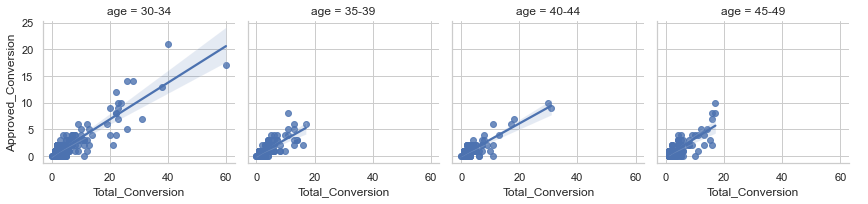

In [41]:
g = sns.FacetGrid(df, col="age")
g.map(sns.regplot, "Total_Conversion", "Approved_Conversion")
g.add_legend()

There is higher approved conversion for the age group of 30-34 after they enquire about the product.

### Let's take a look at Campaign C

Campaign C has the most approved conversion, so let's do some more analysis.

In [44]:
campaign_c = df[df['xyz_campaign_id']=='campaignC'] 
campaign_c.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
518,1121091,campaignC,144531,30-34,M,10,1194718,141,254.049996,28,14
519,1121092,campaignC,144531,30-34,M,10,637648,67,122.400000,13,5
520,1121094,campaignC,144531,30-34,M,10,24362,0,0.000000,1,1
521,1121095,campaignC,144531,30-34,M,10,459690,50,86.330001,5,2
522,1121096,campaignC,144531,30-34,M,10,750060,86,161.909999,11,2


In [45]:
# Distribution of fb_campaign_id with approved_conversion for campaign_c
campaign_c["fb_campaign_id"].unique()

array([144531, 144532, 144533, 144534, 144535, 144536, 144537, 144538,
       144539, 144541, 144545, 144547, 144549, 144552, 144554, 144556,
       144558, 144561, 144562, 144565, 144567, 144568, 144569, 144570,
       144571, 144572, 144573, 144574, 144575, 144576, 144577, 144578,
       144579, 144580, 144581, 144582, 144583, 144584, 144585, 144586,
       144587, 144588, 144589, 144590, 144591, 144592, 144593, 144594,
       144595, 144596, 144597, 144598, 144599, 144601, 144602, 144603,
       144604, 144605, 144606, 144607, 144608, 144609, 144611, 144612,
       144613, 144614, 144615, 144616, 144617, 144618, 144619, 144620,
       144621, 144622, 144623, 144624, 144625, 144626, 144627, 144628,
       144629, 144630, 144631, 144632, 144633, 144634, 144635, 144636,
       144638, 144639, 144640, 144641, 144642, 144643, 144644, 144646,
       144647, 144648, 144649, 144650, 144651, 144652, 144653, 144654,
       144655, 144656, 144657, 144658, 144659, 144660, 144661, 144662,
      

<AxesSubplot:xlabel='fb_campaign_id', ylabel='Approved_Conversion'>

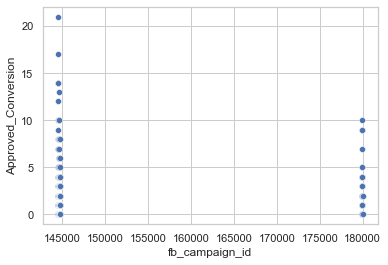

In [46]:
sns.scatterplot(data=campaign_c, x="fb_campaign_id", y="Approved_Conversion")

In [47]:
campaign_c.query('fb_campaign_id > 143000 and fb_campaign_id < 147000')['Approved_Conversion'].mean()

1.3716981132075472

In [48]:
campaign_c.query('fb_campaign_id > 143000 and fb_campaign_id < 147000')['Approved_Conversion'].max()

21

In [49]:
campaign_c.query('fb_campaign_id > 170000 and fb_campaign_id < 180000')['Approved_Conversion'].mean()

1.5263157894736843

In [50]:
campaign_c.query('fb_campaign_id > 170000 and fb_campaign_id < 180000')['Approved_Conversion'].max()

10

We can see that the fb_campaign_ids around 145000 have more approved conversion than around 180000 for campaign c. The fb_campaign_ids around 145000 have the mean of 1.37 with the max of 21 approved conversion, whereas the fb_campaign_ids around 180000 have the mean of 1.52 with the max of 10 approved conversion. 

## Summary

1. Campaign C:
* Campaign C has the most number of ads.
* Campaign C has the most approved conversion count. 

2. age_group:
* The age group of 30-34 had the most interest in Campaign B and Campaign C, whereas the age group of 40-44 had the most interest in Campaign A.

3. gender:
* There weren't major difference in campaign interest by gender.

4. interest:
* The most approved conversion happened for the group that had more than 100 interests.

5. money spent:
* There is a strong correlation between money spent and impressions. As the amount of money spent increases, the number of product purchase increases.
* The approved conversion count suddenly spiked after a certain point.

6. Product bought after clicking the ad:
* Men tend to click more than women, but women buy more products than men after clicking the ad.
* People in the age group of 30-34 has more tendency to purchase product after clicking the ad

7. Conclusion:
* fb_campaign_ids around 145000 have more approved conversion than around 180000 for campaign C. 
* In the age group of 30-34 and 35-39, but true for all the other age groups, men tend to enquire and buy more. Men in these age groups should be targeted next. 
* We will give more attention to people with interest types after 100.

8. What can be improved & what I intend to add:
* Even though I have focused on Campaign C in this project, I would like to add more features, such as click through rate and conversion rate. The click through rate is calculated by dividing clicks by impressions, and the conversion rate is calculated by dividing the number of conversions by total number of clicks. This will help us understand the relationship between click and impression/ click and conversions, not just focusing on the approved conversion like we have done in this project. The more spend particularly could lead to more impression, but might not drive more clicks. Therefore, I am planning to add more data points like these for ad hoc analysis. 

